In [1]:
# Add soundscapy to the Python path
import sys
sys.path.append('..')

from soundscapy import isd
from soundscapy.database import ecod, grouped_ecod, grouped_mcd
from soundscapy.parameters import PARAM_LIST
import matplotlib.pyplot as plt



C:\Users\mitch\miniconda3\envs\soundscapy-dev\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
ssid = isd.load_isd_dataset()
ssid = ssid.isd.filter_lockdown().isd.validate_dataset(allow_na=False)
ssid = ssid.dropna(subset=PARAM_LIST)

Renaming PAQ columns.
Checking PAQ data quality.
Identified 56 samples to remove.
[95, 108, 124, 127, 146, 154, 160, 178, 186, 203, 220, 226, 255, 381, 404, 407, 431, 562, 571, 577, 586, 590, 606, 631, 659, 666, 675, 689, 694, 707, 729, 839, 846, 877, 897, 992, 1007, 1027, 1055, 1056, 1064, 1097, 1214, 1217, 1222, 1223, 1225, 1229, 1235, 1255, 1268, 1269, 1300, 1316, 1321, 1335]


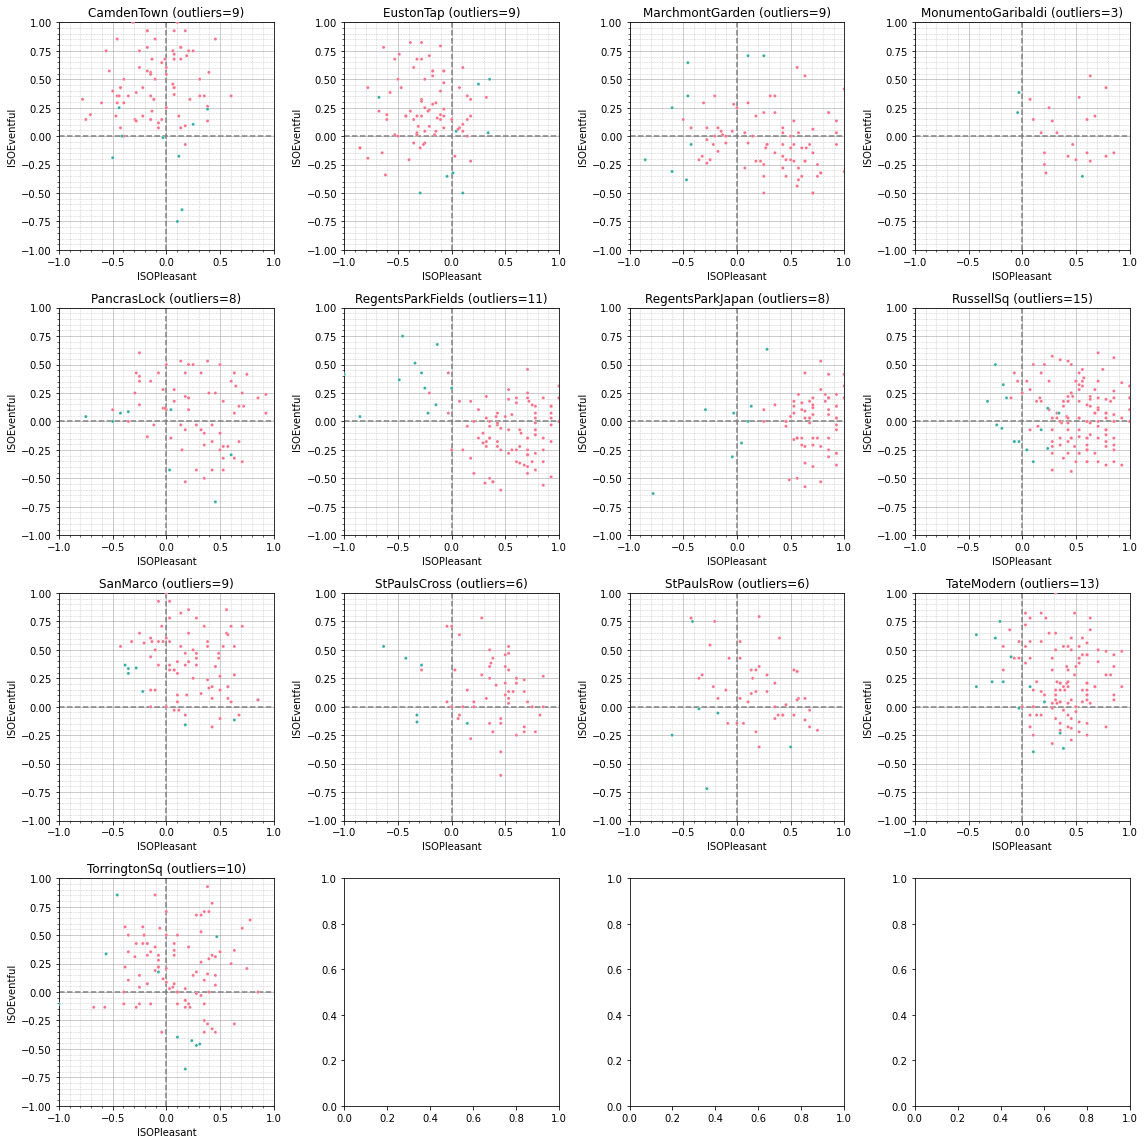

In [3]:
ssid = ssid.isd.paq_grouped_outliers()

fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='PAQ_outliers', prim_labels=False,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['PAQ_outliers'].sum()})"
    )
plt.tight_layout()

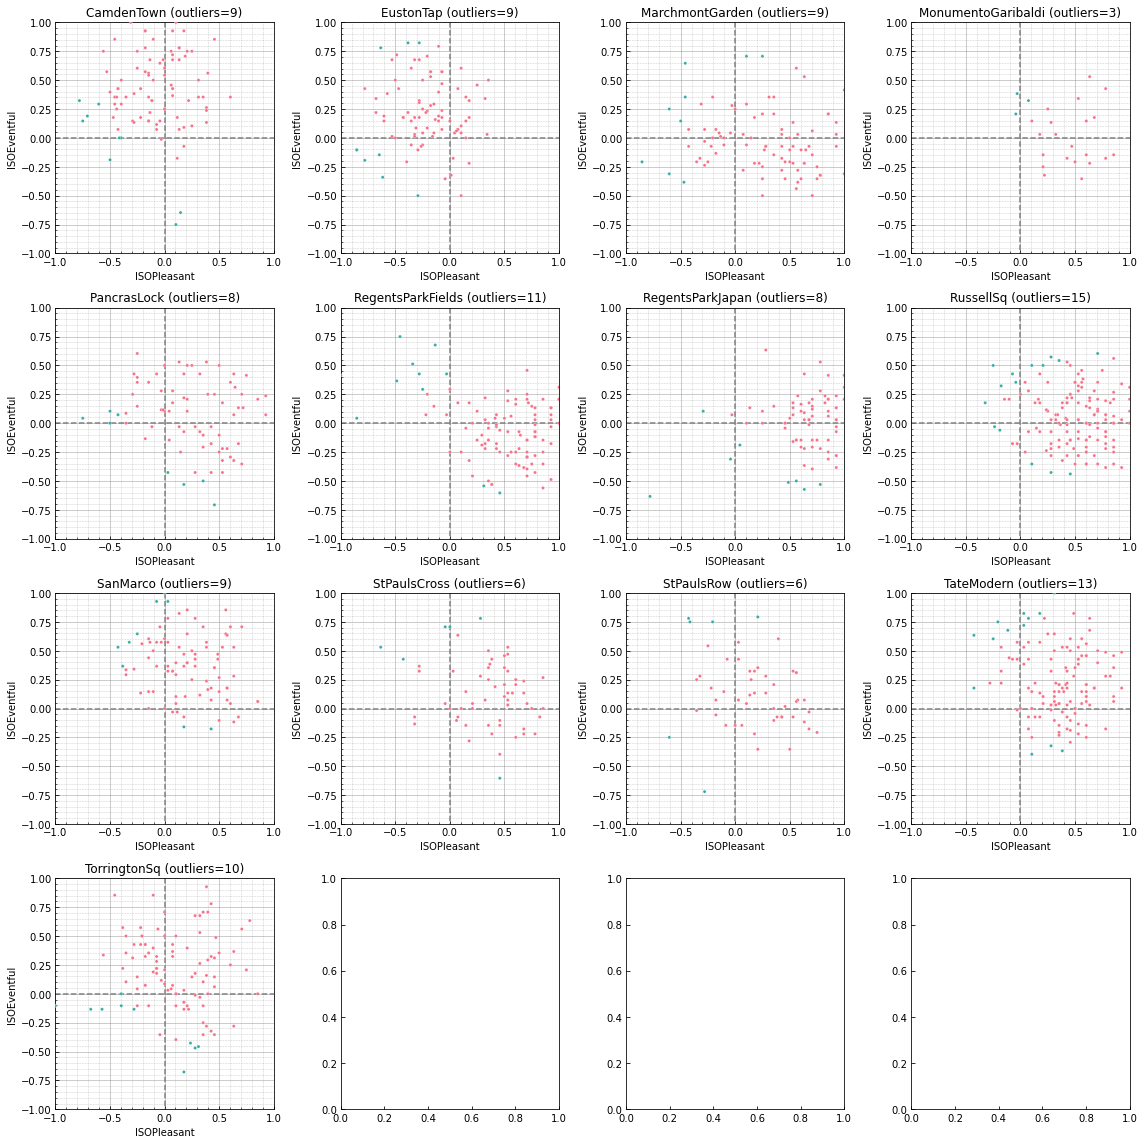

In [4]:
ssid = ssid.isd.iso_grouped_outliers()

fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='ISO_outliers', prim_labels=False,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['ISO_outliers'].sum()})"
    )
plt.tight_layout()

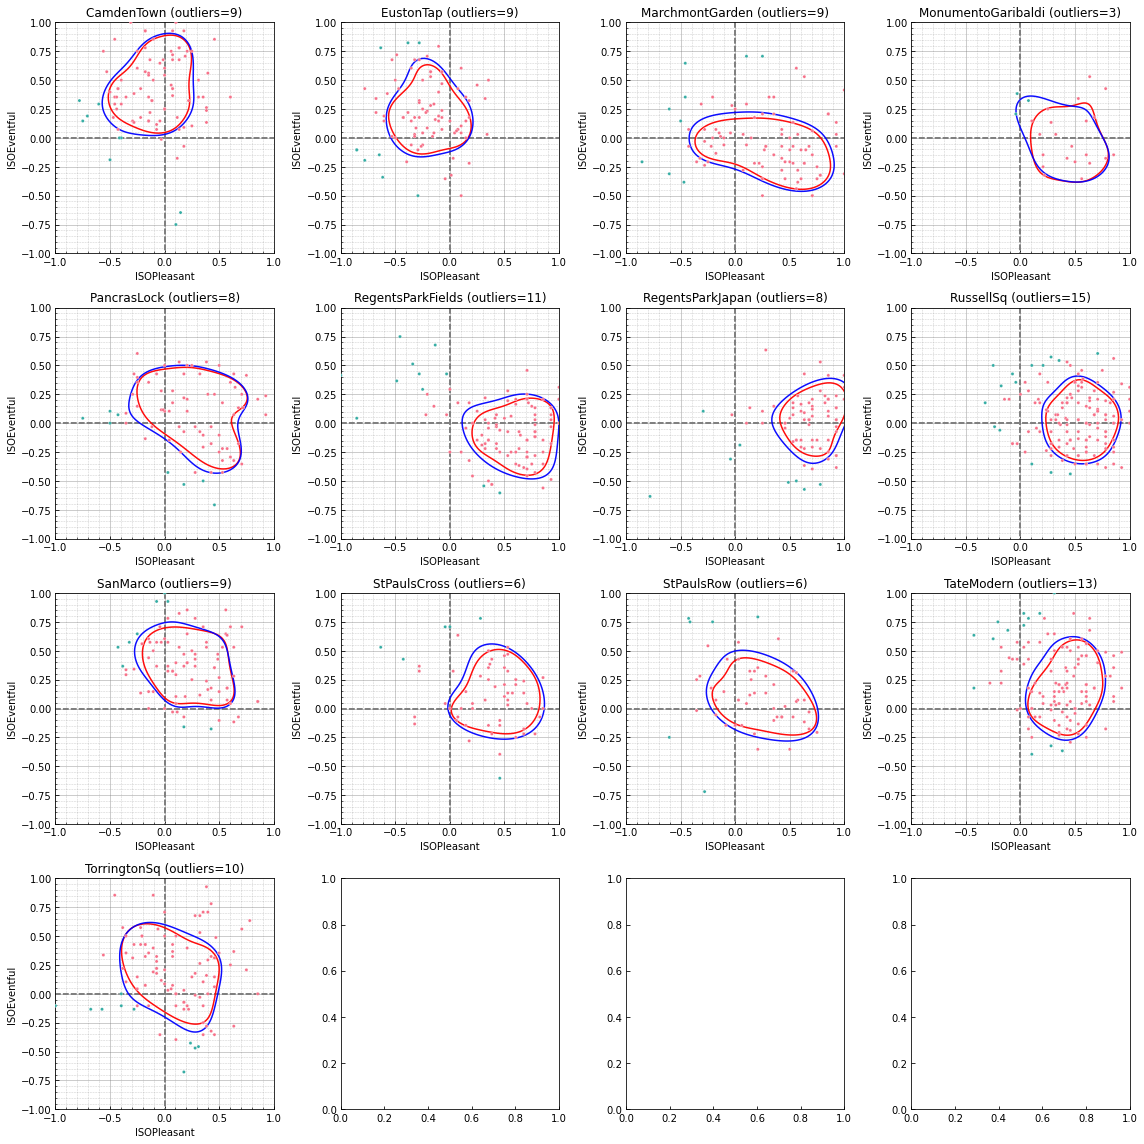

In [5]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.query("ISO_outliers==0").isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, incl_scatter=False, fill=False, thresh=0.5, levels=2,
        title=None, fill_color='red'
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, fill=False, thresh=0.5, levels=2,
        title=None
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='ISO_outliers', prim_labels=False,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['ISO_outliers'].sum()})"
    )
plt.tight_layout()

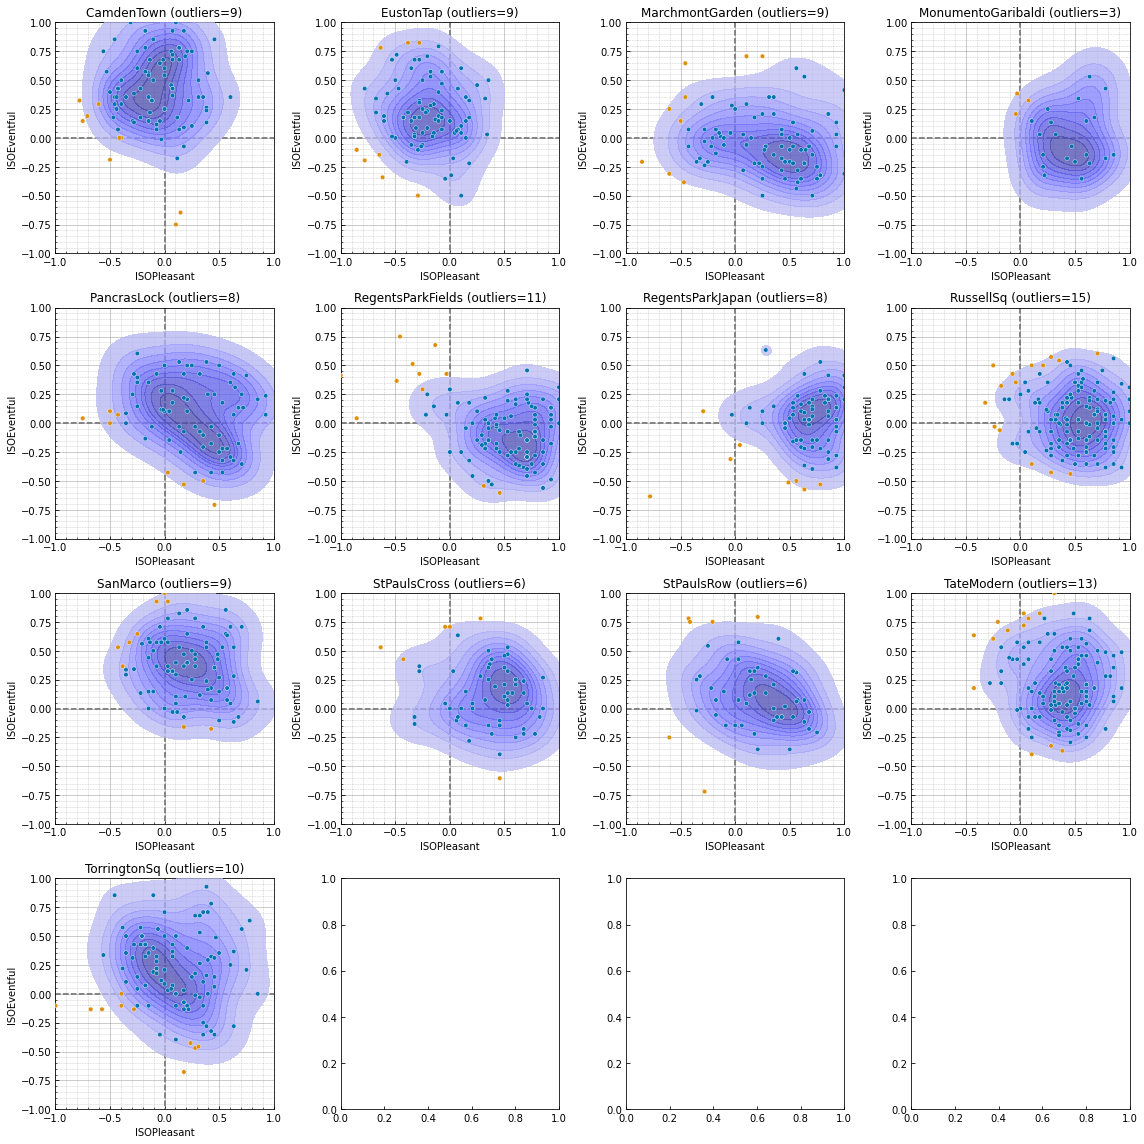

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.query("ISO_outliers==0").isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, alpha=0.75,
        title=None
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='ISO_outliers', prim_labels=False, palette='colorblind', s=20,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['ISO_outliers'].sum()})")
plt.tight_layout()

In [7]:
ssid, fits = grouped_ecod(ssid, groupby='LocationID', features=isd.PAQ_NAMES + PARAM_LIST, new_col='multi_outs')

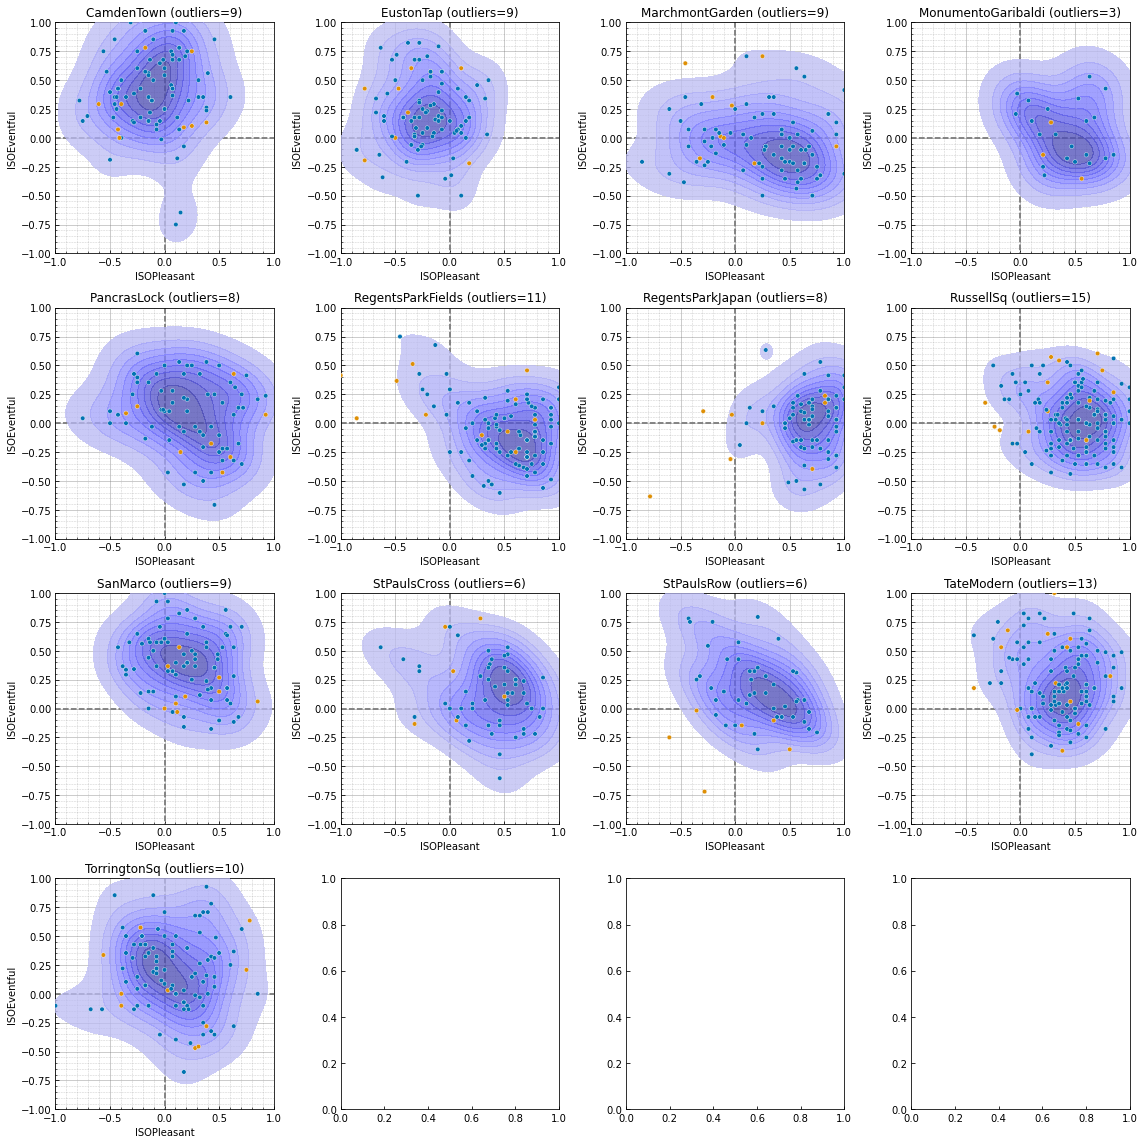

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.query("multi_outs==0").isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, alpha=0.75,
        title=None
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='multi_outs', prim_labels=False, palette='colorblind', s=20,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['multi_outs'].sum()})")
plt.tight_layout()

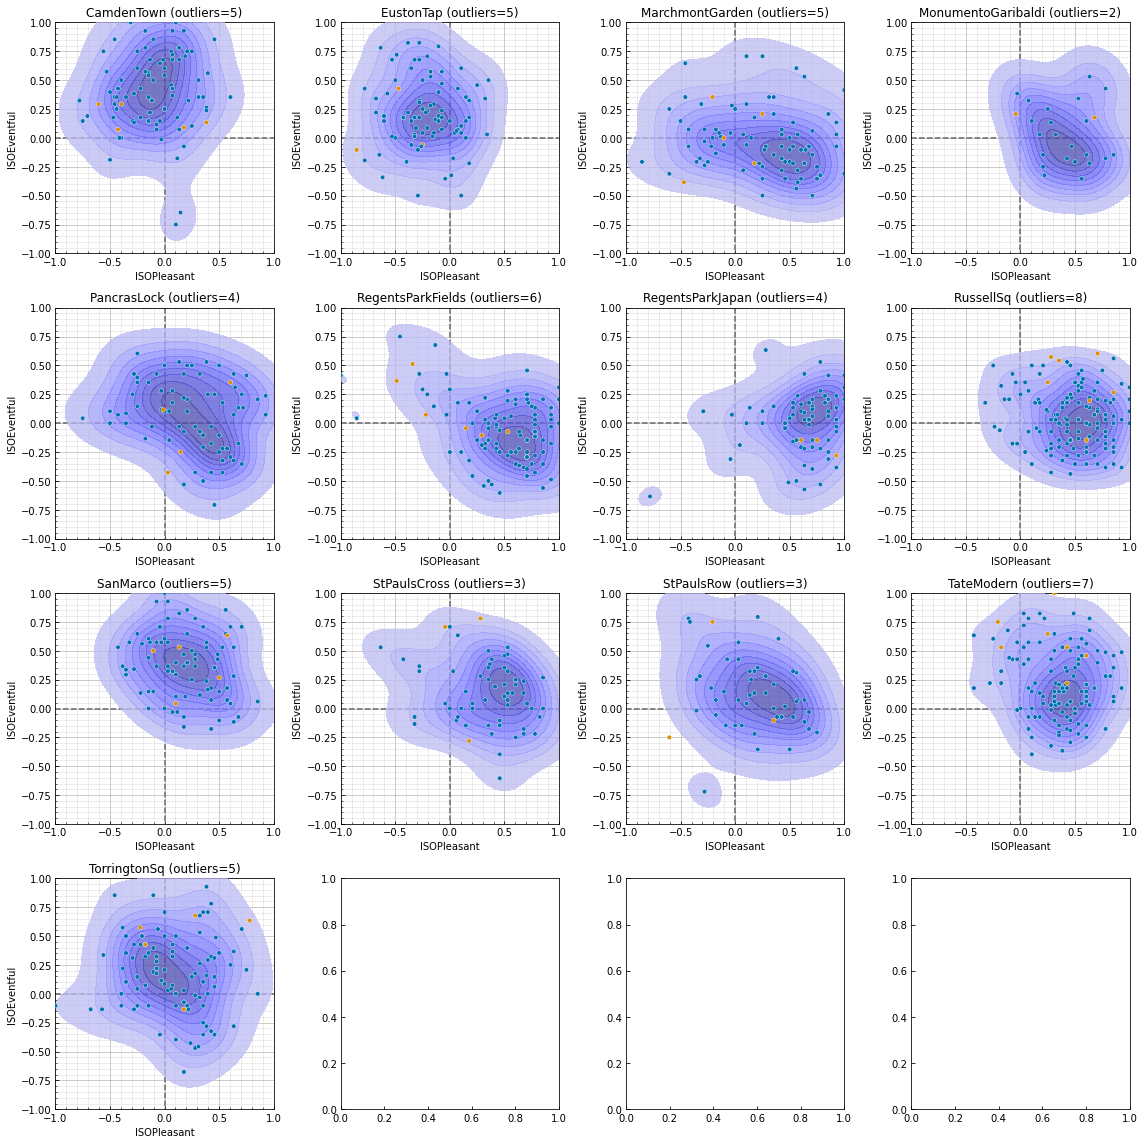

In [16]:
ssid, fits = grouped_mcd(ssid, "LocationID", features=isd.PAQ_NAMES + PARAM_LIST, new_col='mcd_outs', contamination=0.05)

fig, axes = plt.subplots(4, 4, figsize=(16,16))
for i, locat in enumerate(ssid.LocationID.unique()):
    ssid.query("mcd_outs==0").isd.filter_location_ids(locat).isd.circumplex_density(
        ax=axes.flatten()[i], prim_labels=False, alpha=0.75,
        title=None
    )
    ssid.isd.filter_location_ids(locat).isd.circumplex_scatter(
        ax=axes.flatten()[i],
        hue='mcd_outs', prim_labels=False, palette='colorblind', s=20,
        title=f"{locat} (outliers={ssid.isd.filter_location_ids(locat)['mcd_outs'].sum()})")
plt.tight_layout()

In [17]:
ssid.query("mcd_outs == 0")[PARAM_LIST + ['ISOPleasant', 'ISOEventful']].corr()

,LAeq_L(A)(dB(SPL)),LZeq_L(dB(SPL)),LA10_LA90(dB(SPL)),LC10_LC90(dB(SPL)),LCeq_LAeq(dB(SPL)),Loudness_N5(soneGF),N10_N90(soneGF),Rough_HM_R(asper),Sharpness_S(acum),"Ton_HM_Avg,arith(tuHMS)","FS_Avg,arith(vacil)",RA_2D_cp(cPa),PA(Zwicker),"I_HM_Avg,arith(iu)",ISOPleasant,ISOEventful
LAeq_L(A)(dB(SPL)),1.000000,0.683553,0.154187,0.075148,-0.601884,0.940179,0.657507,0.729122,0.547732,0.530769,0.300329,0.735826,0.893259,-0.161997,-0.344821,0.368728
LZeq_L(dB(SPL)),0.683553,1.000000,0.045216,0.336895,0.124780,0.687695,0.505504,0.566687,0.218209,0.402268,0.149825,0.804424,0.611901,-0.151847,-0.361885,0.269303
LA10_LA90(dB(SPL)),0.154187,0.045216,1.000000,0.598619,-0.169362,0.256569,0.690337,0.313980,-0.277754,0.386444,0.453997,0.208423,0.145010,0.417309,-0.181031,0.125564
LC10_LC90(dB(SPL)),0.075148,0.336895,0.598619,1.000000,0.239070,0.176945,0.506279,0.213140,-0.205319,0.161120,0.219928,0.234751,0.101358,0.200853,-0.207542,0.026995
LCeq_LAeq(dB(SPL)),-0.601884,0.124780,-0.169362,0.239070,1.000000,-0.490339,-0.303073,-0.336519,-0.534352,-0.237820,-0.248602,-0.111257,-0.528629,0.023482,0.034338,-0.187233
Loudness_N5(soneGF),0.940179,0.687695,0.256569,0.176945,-0.490339,1.000000,0.807822,0.736269,0.534783,0.566408,0.349667,0.747547,0.963178,-0.116331,-0.381950,0.351501
N10_N90(soneGF),0.657507,0.505504,0.690337,0.506279,-0.303073,0.807822,1.000000,0.654262,0.152376,0.572309,0.430070,0.600873,0.719924,0.140191,-0.387794,0.295390
Rough_HM_R(asper),0.729122,0.566687,0.313980,0.213140,-0.336519,0.736269,0.654262,1.000000,0.052764,0.523762,0.445252,0.718811,0.607045,0.199282,-0.375030,0.341236
Sharpness_S(acum),0.547732,0.218209,-0.277754,-0.205319,-0.534352,0.534783,0.152376,0.052764,1.000000,-0.007979,-0.035522,0.151565,0.706889,-0.409989,0.021718,0.045271
"Ton_HM_Avg,arith(tuHMS)",0.530769,0.402268,0.386444,0.161120,-0.237820,0.566408,0.572309,0.523762,-0.007979,1.000000,0.495501,0.576824,0.468615,0.140597,-0.202888,0.314736


In [18]:
ssid[PARAM_LIST + ['ISOPleasant', 'ISOEventful']].corr()

,LAeq_L(A)(dB(SPL)),LZeq_L(dB(SPL)),LA10_LA90(dB(SPL)),LC10_LC90(dB(SPL)),LCeq_LAeq(dB(SPL)),Loudness_N5(soneGF),N10_N90(soneGF),Rough_HM_R(asper),Sharpness_S(acum),"Ton_HM_Avg,arith(tuHMS)","FS_Avg,arith(vacil)",RA_2D_cp(cPa),PA(Zwicker),"I_HM_Avg,arith(iu)",ISOPleasant,ISOEventful
LAeq_L(A)(dB(SPL)),1.000000,0.710307,0.238083,0.147849,-0.609941,0.930077,0.674175,0.717789,0.561620,0.572941,0.368672,0.734828,0.840856,-0.085591,-0.345032,0.369712
LZeq_L(dB(SPL)),0.710307,1.000000,0.119646,0.372305,0.078636,0.711558,0.544514,0.597227,0.254851,0.448154,0.225816,0.795014,0.611406,-0.072018,-0.361630,0.275095
LA10_LA90(dB(SPL)),0.238083,0.119646,1.000000,0.637166,-0.220388,0.330578,0.723448,0.308513,-0.192968,0.401095,0.436348,0.226912,0.214298,0.359322,-0.183316,0.147365
LC10_LC90(dB(SPL)),0.147849,0.372305,0.637166,1.000000,0.183730,0.249700,0.564210,0.234974,-0.149688,0.192760,0.239269,0.250200,0.159376,0.196299,-0.193983,0.058475
LCeq_LAeq(dB(SPL)),-0.609941,0.078636,-0.220388,0.183730,1.000000,-0.486381,-0.316657,-0.306544,-0.536890,-0.282581,-0.272734,-0.136839,-0.492344,0.019512,0.045239,-0.198132
Loudness_N5(soneGF),0.930077,0.711558,0.330578,0.249700,-0.486381,1.000000,0.823345,0.744114,0.563668,0.632881,0.436790,0.738970,0.943188,-0.025445,-0.371524,0.334641
N10_N90(soneGF),0.674175,0.544514,0.723448,0.564210,-0.316657,0.823345,1.000000,0.636106,0.209313,0.593227,0.480032,0.590082,0.712517,0.179548,-0.360939,0.286532
Rough_HM_R(asper),0.717789,0.597227,0.308513,0.234974,-0.306544,0.744114,0.636106,1.000000,0.120121,0.543427,0.465008,0.706577,0.631248,0.243458,-0.357029,0.318032
Sharpness_S(acum),0.561620,0.254851,-0.192968,-0.149688,-0.536890,0.563668,0.209313,0.120121,1.000000,0.131238,0.046689,0.180884,0.712375,-0.362145,0.000700,0.046918
"Ton_HM_Avg,arith(tuHMS)",0.572941,0.448154,0.401095,0.192760,-0.282581,0.632881,0.593227,0.543427,0.131238,1.000000,0.520156,0.581480,0.588526,0.161278,-0.210164,0.298939
